In [1]:
!nvidia-smi

Wed Mar 13 00:24:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:09:00.0  On |                  N/A |
|  0%   48C    P8             15W /  170W |    1317MiB /  12288MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os

HOME = os.getcwd()
print(HOME)

C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION


In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9


Cloning into 'yolov9'...


In [3]:
from IPython.display import Image

In [5]:
!pip install roboflow

  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/a5/3e/dd9ba72528559149c0f04e47d30411392e0b9d8a2c8aa9319e65bf21600e/roboflow-1.1.23-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
  Obtaining dependency information for cycler==0.10.0 from https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for idna==2.10 from https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/idna-2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/60/e7/a6dedca760db7a4686fd3b6053487ad4ad4d8f0591295dc8a

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.1 requires opencv-python-headless>=4.9.0, but you have opencv-python-headless 4.8.0.74 which is incompatible.
tensorflow-intel 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow-intel 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.10.0 which is incompatible.


In [4]:
# Create the directory
weights_dir = os.path.join(HOME, "weights")
os.makedirs(weights_dir, exist_ok=True)

In [12]:
import requests

# URLs of the files to download
urls = [
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt",
    "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt"
]

# Download each file
for url in urls:
    filename = os.path.join(weights_dir, os.path.basename(url))
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

In [5]:
# List files in the weights directory
files = os.listdir(weights_dir)
for file in files:
    print(file)

gelan-c.pt
gelan-e.pt
yolov9-c.pt
yolov9-e.pt


In [6]:
%cd {HOME}/yolov9

C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9


In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="rpsE7DkIdbpBlMgMXuiZ")
project = rf.workspace("qcdirtymarks-annotation").project("dirty_marks_detection")
version = project.version(5)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dirty_marks_detection-5 in yolov9:: 100%|██████████| 402/402 [00:00<00:00, 1913.56it/s]


In [33]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9


train: weights=C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9\dirty_marks_detection-5/data.yaml, hyp=hyp.scratch-high.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  1e33dbb Python-3.11.5 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0

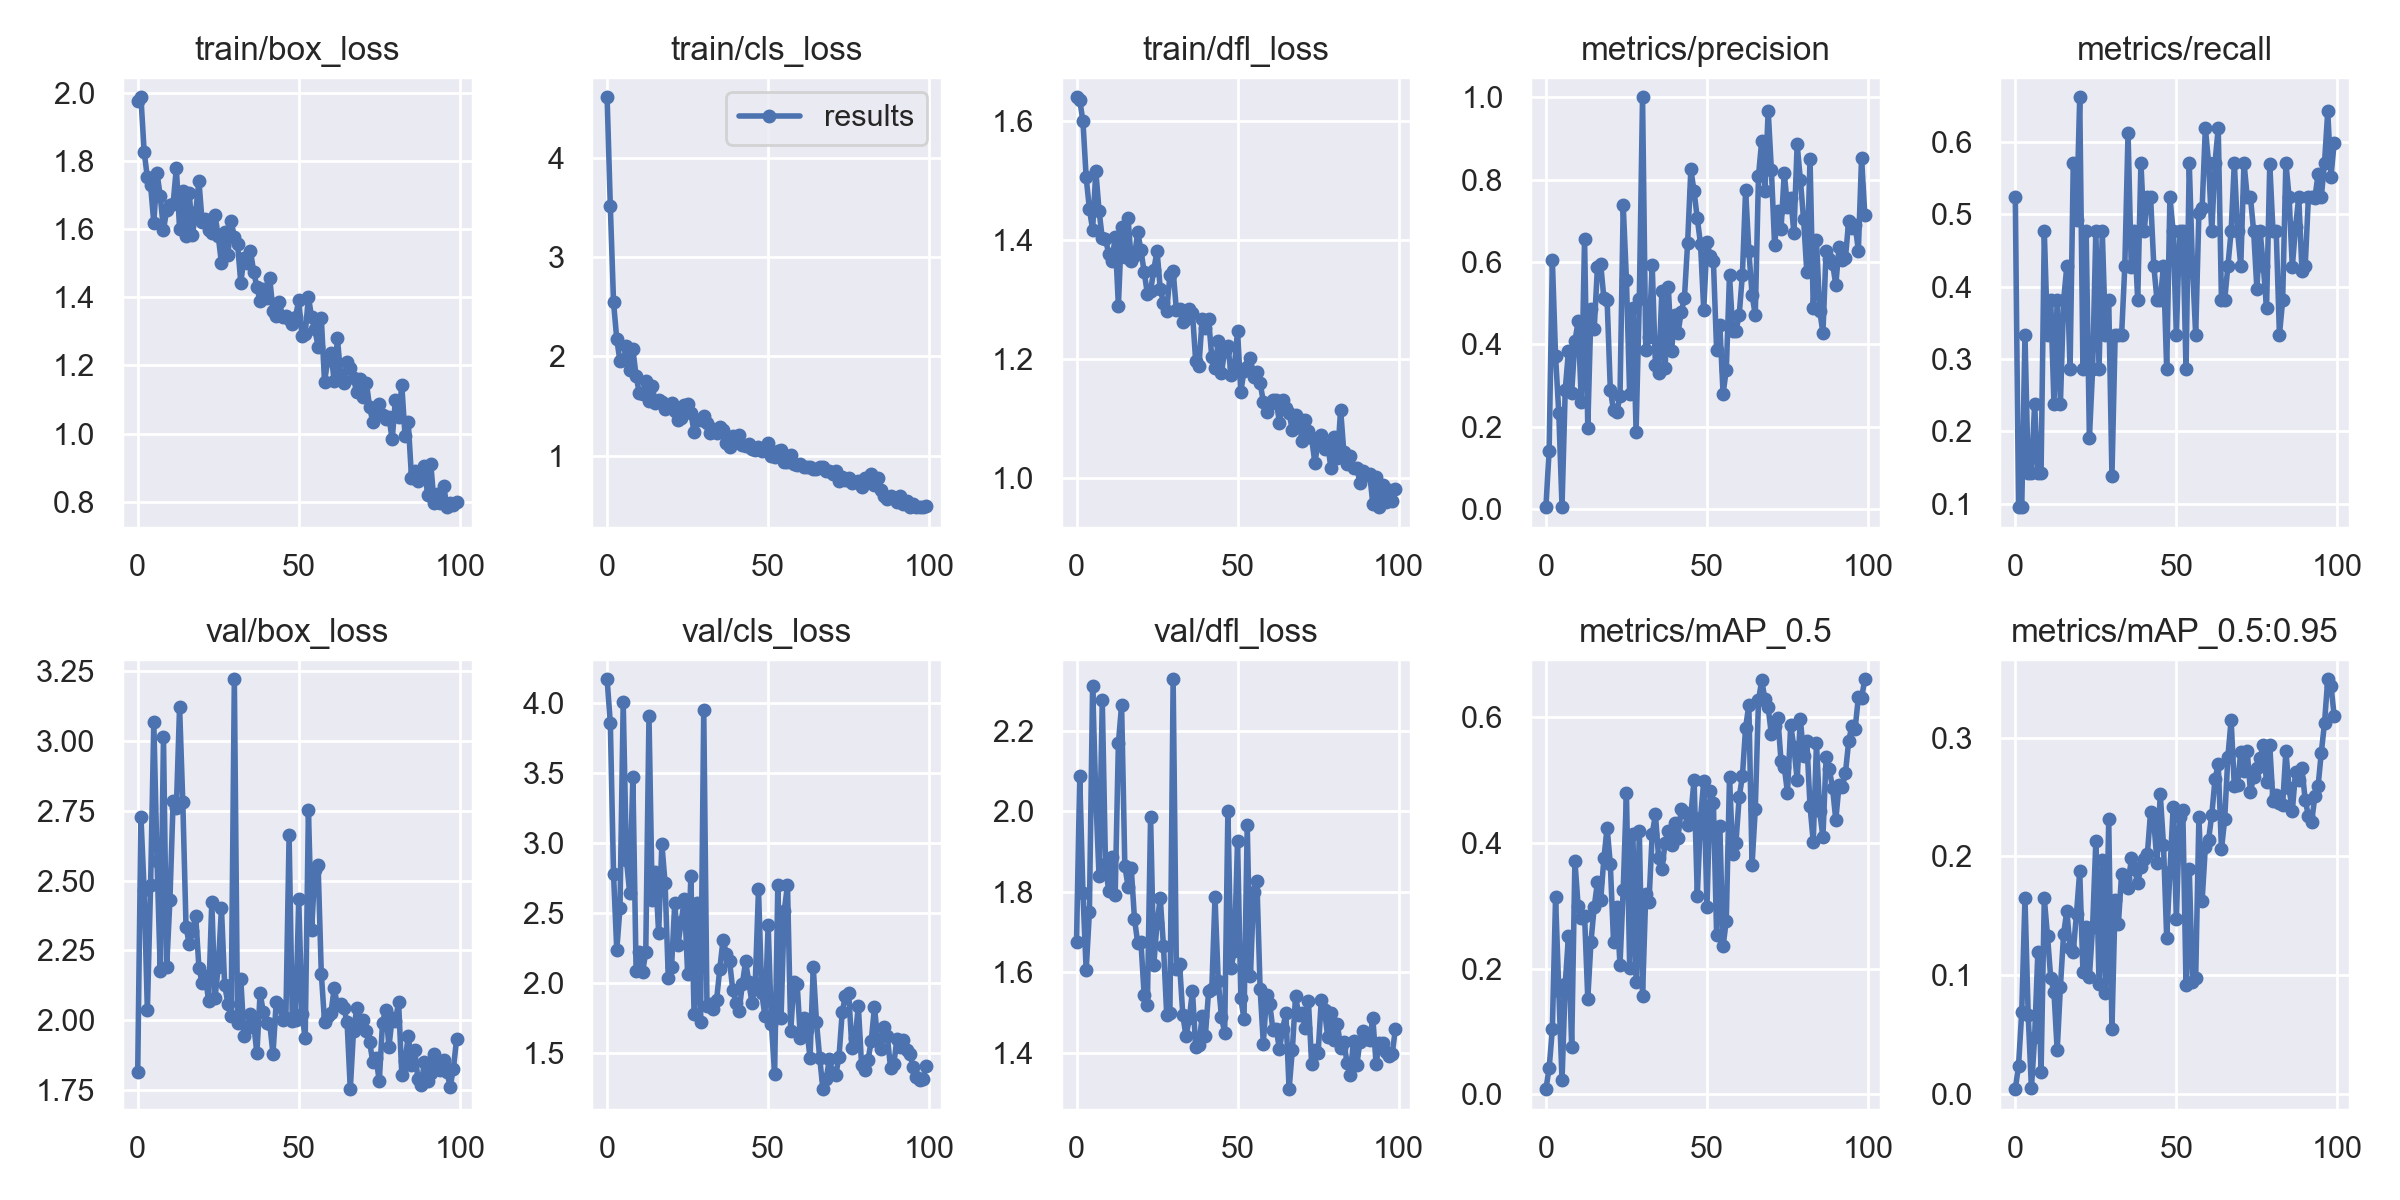

In [7]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)

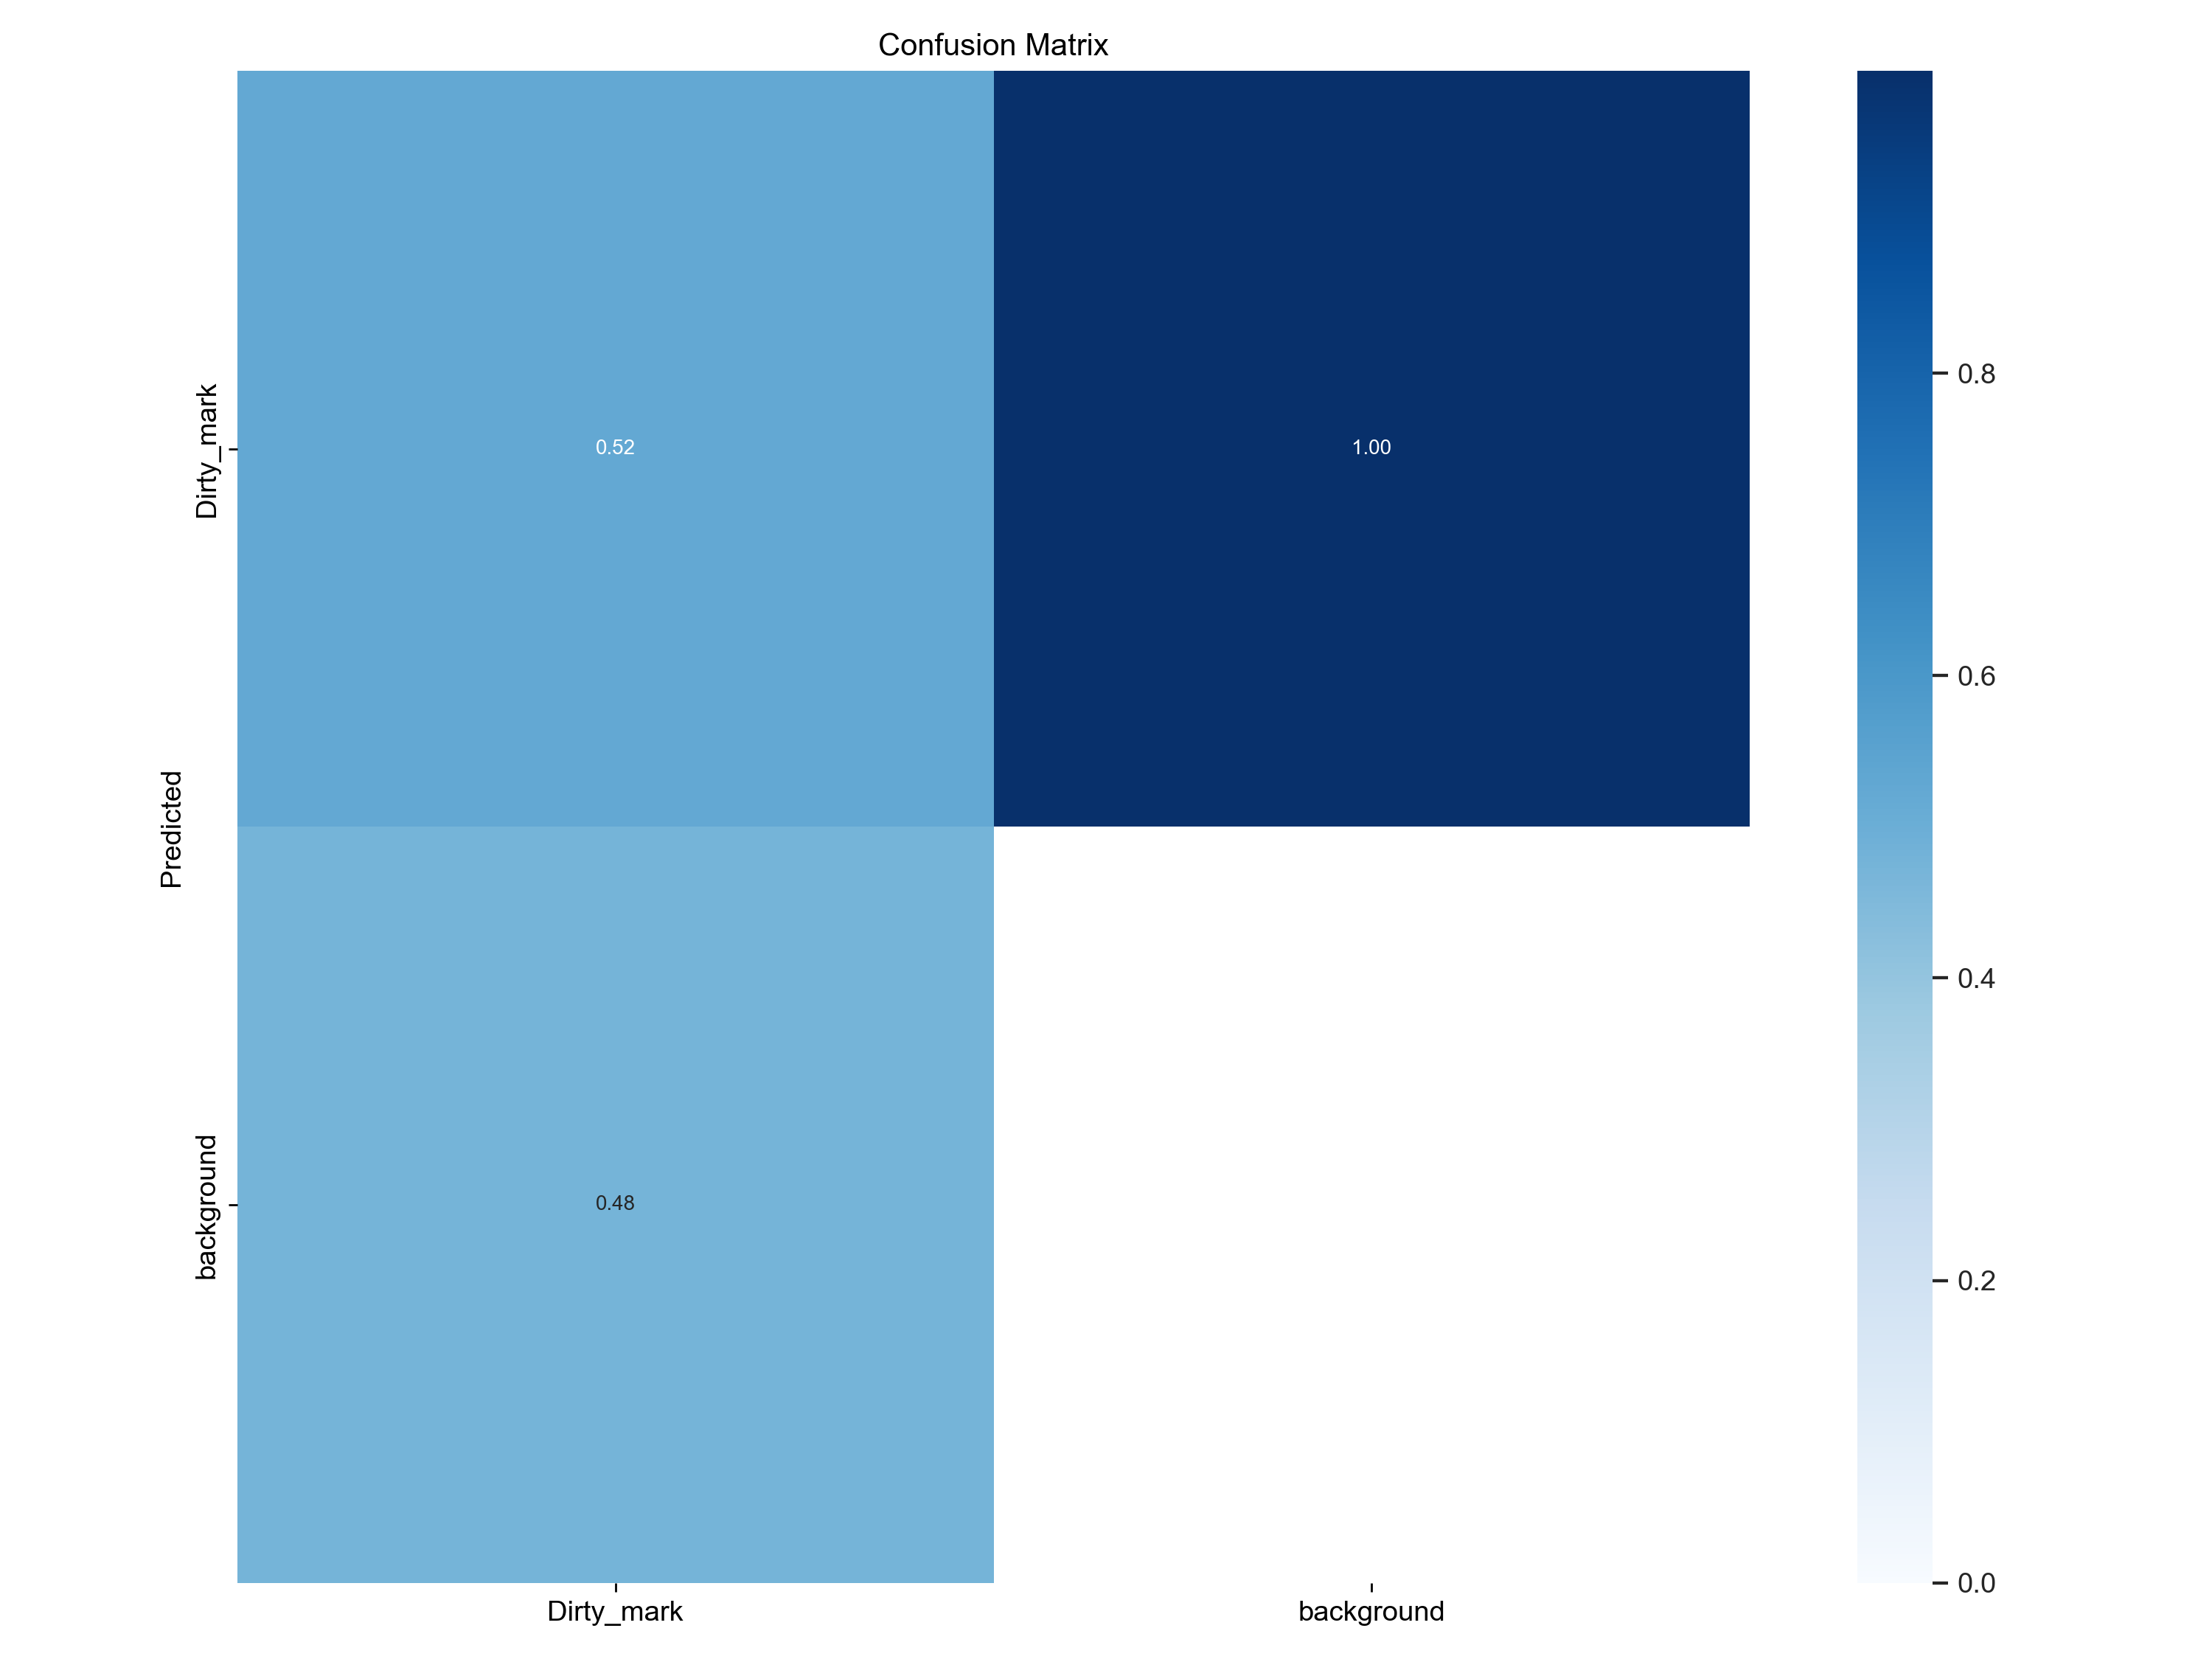

In [5]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [23]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {HOME}/yolov9/dirty_marks_detection-5/data.yaml \
--weights {HOME}/yolov9/runs/train/exp2/weights/last.pt

C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9


val: data=C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION/yolov9/dirty_marks_detection-5/data.yaml, weights=['C:\\Users\\jubay\\Desktop\\YOLO_QC_OBJ_DETECTION/yolov9/runs/train/exp2/weights/last.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5  1e33dbb Python-3.11.5 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs

val: Scanning C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9\dirty_marks_detection-5\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|##########| 8/8 00:00
val: Scanning C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9\dirty_marks_detection-5\valid\labels.cache... 8 images, 0 backgrounds, 0 cor

In [24]:
pip install "albumentations>=1.0.3

Note: you may need to restart the kernel to use updated packages.


In [18]:
!python detect.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/exp2/weights/last.pt \
--source {HOME}/yolov9/dirty_marks_detection-5/valid/images

detect: weights=['C:\\Users\\jubay\\Desktop\\YOLO_QC_OBJ_DETECTION/yolov9/runs/train/exp2/weights/last.pt'], source=C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION/yolov9/dirty_marks_detection-5/valid/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  1e33dbb Python-3.11.5 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
image 1/8 C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9\dirty_marks_detection-5\valid\images\303_jpg.rf.f67da65ab35e852b44d59f7527880f7c.jpg: 640x480 3 Dirty_marks, 145.4ms
image 2/8 C:\Users\jubay\Desktop\Y

In [20]:
%cd {HOME}/yolov9

!python detect.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/exp2/weights/last.pt \
--source {HOME}/yolov9/dirty_marks_detection-5/test/images/*.jpg


C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9


detect: weights=['C:\\Users\\jubay\\Desktop\\YOLO_QC_OBJ_DETECTION/yolov9/runs/train/exp2/weights/last.pt'], source=C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION/yolov9/dirty_marks_detection-5/test/images/*.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  1e33dbb Python-3.11.5 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
image 1/5 C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9\dirty_marks_detection-5\test\images\DirtMark4.jpg: 640x448 2 Dirty_marks, 133.0ms
image 2/5 C:\Users\jubay\Desktop\YOLO_QC_OBJ_DETECTION\yolov9\di

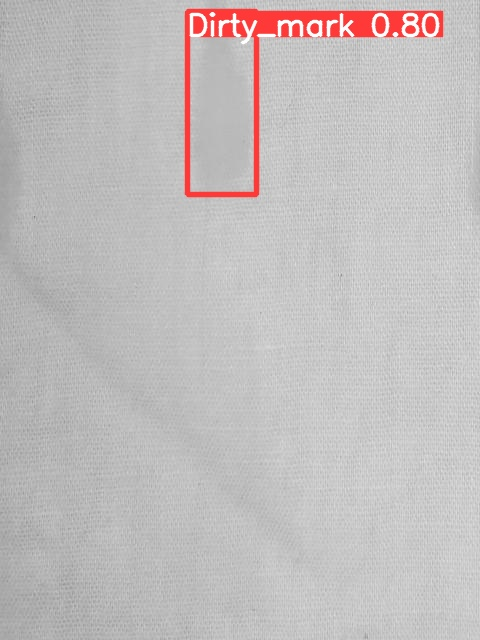

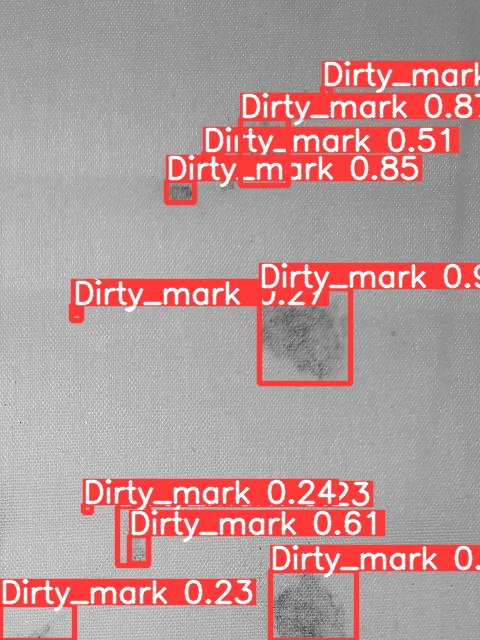

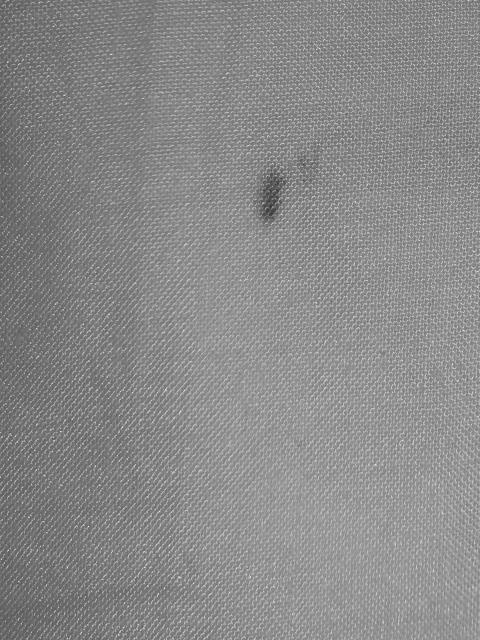

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp24/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [30]:
# Display the image
image_path = f"{HOME}/yolov9/runs/detect/exp10/c.jpg"
display(Image(filename=image_path, width=600))


ValueError: Cannot embed the 'webp' image format